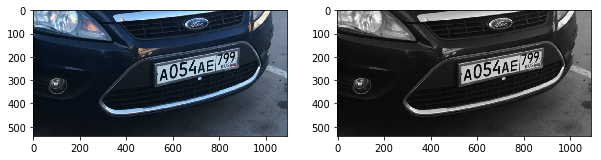

In [66]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/vehicle_palette2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1); plt.imshow(img);
fig.add_subplot(1, 2, 2); plt.imshow(img_grayscale, cmap=plt.cm.gray);

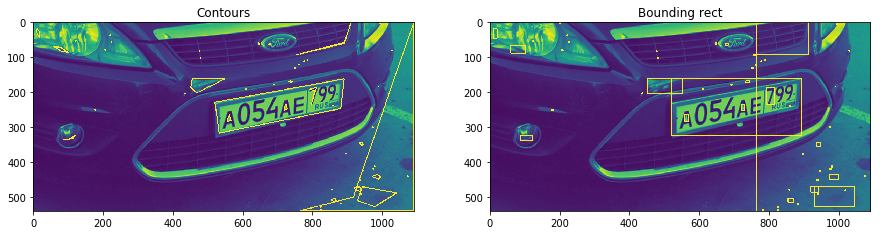

In [67]:
# Apply Gaussian blur
kernel_size = 5
img_blured = cv2.GaussianBlur(img_grayscale, (kernel_size, kernel_size),0)

# (CLAHE) filtering algorithm
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
histogram_norm_img = clahe.apply(img_blured)
# Threshold
_, img_thresholded = cv2.threshold(histogram_norm_img, 0, 255, cv2.THRESH_OTSU)
# Contours
contours, _ = cv2.findContours(img_thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

wth_conts = img_grayscale.copy()
wth_bboxes = img_grayscale.copy()

contours = sorted(contours, key=cv2.contourArea, reverse=True)

for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.04 * cv2.arcLength(cnt, True), True)
    if (len(approx) == 4):
        
        cv2.drawContours(wth_conts, [approx], 0, (255, 0 ,0), 2)

        x,y,w,h = cv2.boundingRect(cnt)
        bounding_rec = np.array([[x, y], [x + w, y],
                                    [x, y + h], [x + w, y + h]], np.float32)        

        cv2.rectangle(wth_bboxes, (x, y), (x + w, y + h), (255, 0 ,0), 2)
        
        # approx = approx.reshape(bounding_rec.shape).astype(np.float32)
        # M = cv2.getPerspectiveTransform(approx, bounding_rec)
        # warp = cv2.warpPerspective(img, M, (w, h))
        
fig = plt.figure(figsize=(15, 15))

fig.add_subplot(1, 2, 1)
plt.title('Contours')
plt.imshow(wth_conts)

fig.add_subplot(1, 2, 2)
plt.title('Bounding rect')
plt.imshow(wth_bboxes)

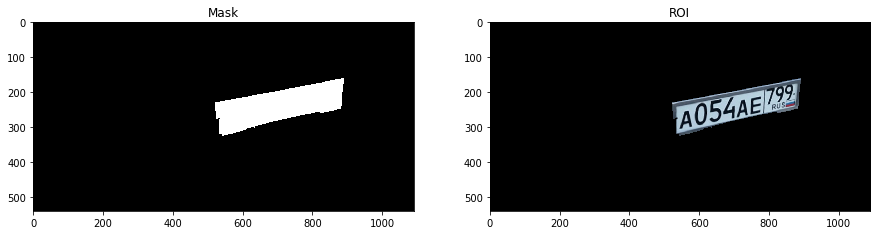

In [68]:
mask = np.zeros(img.shape, np.uint8)

mask = cv2.fillPoly(mask, pts=[contours[1]], color=(255,255,255))

masked_img = cv2.bitwise_and(mask, img)
fig = plt.figure(figsize=(15, 15))

fig.add_subplot(1, 2, 1)
plt.title('Mask')
plt.imshow(mask)

fig.add_subplot(1, 2, 2)
plt.title('ROI')
plt.imshow(masked_img)

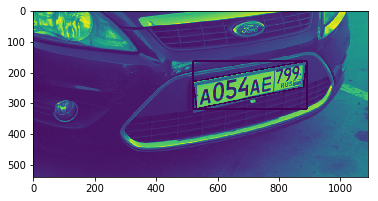

In [87]:
target_cnt = cv2.approxPolyDP(contours[1], 0.04 * cv2.arcLength(contours[1], True), True).reshape((4,2))
x,y,w,h = cv2.boundingRect(target_cnt)
bounding_rec = np.array([[x, y], [x + w, y],
                        [x, y + h], [x + w, y + h]], np.float32)

contours_with_bounding_rect = img_grayscale.copy()

cv2.polylines(contours_with_bounding_rect, [target_cnt], True, (0, 255, 0), 4)
cv2.rectangle(contours_with_bounding_rect, (x, y), (x + w, y + h), (0, 255, 0), 4)

plt.imshow(contours_with_bounding_rect)

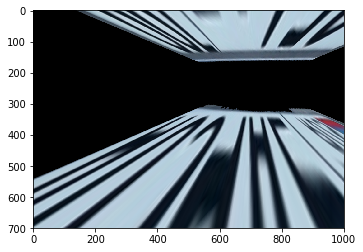

In [115]:
M = cv2.getPerspectiveTransform(np.float32(target_cnt), bounding_rec)

res = cv2.warpPerspective(masked_img, M, (1000, 700))
plt.imshow(res)

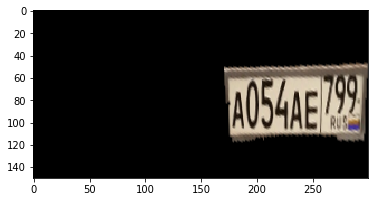

In [130]:
test = cv2.imread('./images/test.PNG')

origin = np.array([[171, 76], [300, 53], [300, 80], [177, 99]], np.float32)
dest = np.array([[171, 53], [300, 53], [300, 115], [177, 99]], np.float32)

Mtest = cv2.getPerspectiveTransform(origin, dest)
r = cv2.warpPerspective(test, Mtest, (300, 150))
plt.imshow(r)